In [ ]:
'''
Comparison of Linear Regression Using OLS and SGD
1. Overview of the Methods
Ordinary Least Squares (OLS):

Finds the optimal weights (𝑤) and bias (b) by minimizing the sum of squared residuals directly.
Uses matrix operations to derive the closed-form solution.
Suitable for small datasets due to computational efficiency.

Stochastic Gradient Descent (SGD):

Iteratively adjusts the weights and bias by moving in the direction of the gradient of the loss function.
Works well for large datasets or when computational efficiency is required.


'''

In [ ]:
'''
Advantages of SGD
Faster updates on large datasets since it processes one sample at a time.
Can escape local minima due to noisy updates.
Disadvantages of SGD
Noisy updates can lead to instability.
Requires careful tuning of the learning rate.
'''

In [ ]:
'''
Explanation of the Code
OLS:

Computes the optimal weights (w) and bias (b) using the closed-form formula.
Predictions for y are made using the derived model.

SGD:

Initializes weights and bias to zero.
Iteratively updates weights and bias for each sample in each epoch.
Stores intermediate predictions to visualize how the model evolves.

Visualization:

Actual data points are plotted as a scatter plot.
OLS regression line is shown in green (straight line).
SGD regression line is shown in red after convergence.
Intermediate SGD steps are visualized using gray dashed lines for better understanding.
Output
Graph:
Shows the progression of SGD and the comparison with OLS.
Final Parameters:
Displays w and b for both OLS and SGD.

The code snippet is part of the visualization process where the
intermediate predictions from Stochastic Gradient Descent (SGD) are plotted. Here's a detailed explanation:

Line Breakdown
1. Enumerating Over Intermediate Predictions

for i, y_pred in enumerate(history_y_pred[::len(X)]):
history_y_pred: A list storing the predictions of
y at each step of SGD after updating weights and bias.
history_y_pred[::len(X)]:
This slicing retrieves predictions after completing each full pass (epoch) over the dataset.
len(X) represents the number of samples in the dataset.
history_y_pred[::len(X)] means: "Take every
len(X)-th element from history_y_pred," corresponding to the end of each epoch.
2. Plotting Intermediate Predictions

plt.plot(X, y_pred, linestyle='--', color='gray', alpha=0.4, label=f'Epoch {i + 1} (SGD)' if i < 1 else "")
plt.plot(X, y_pred, ...): Plots the
X values against the intermediate predictions
y pred
​
 .
linestyle='--': Dashed line style for intermediate predictions to visually distinguish them from final predictions or the OLS line.
color='gray': A light gray color for the dashed lines, indicating intermediate steps.
alpha=0.4: Adjusts transparency to make the intermediate steps less prominent and avoid cluttering the plot.
label=f'Epoch {i + 1} (SGD)' if i < 1 else "":
Adds a label only for the first dashed line to show that it corresponds to an intermediate SGD prediction after "Epoch 1."
For subsequent epochs, the label is left empty ("") to avoid repeated legends.
Purpose
This block adds a visual representation of how the SGD model evolves:

The dashed lines show the predictions at the end of each epoch.
It helps you see how the model's predictions gradually converge to the final solution.
Key Example
Imagine:

𝑋=[1,2,3,4,5]
𝑦=[1.2,2.4,3.1,4.5,5.0]
If history_y_pred contains predictions after each update, for
10 epochs, the list might look like:


history_y_pred = [
    [0.5, 0.8, 1.0, 1.3, 1.6],  # After first few updates
    [0.8, 1.4, 1.8, 2.2, 2.6],  # End of Epoch 1
    [1.0, 1.6, 2.1, 2.5, 3.0],  # End of Epoch 2
    ...
]
This snippet ensures only these epoch-level predictions are plotted:

First epoch prediction: [0.8, 1.4, 1.8, 2.2, 2.6]
Second epoch prediction: [1.0, 1.6, 2.1, 2.5, 3.0]
And so on, creating dashed lines for each epoch.


'''


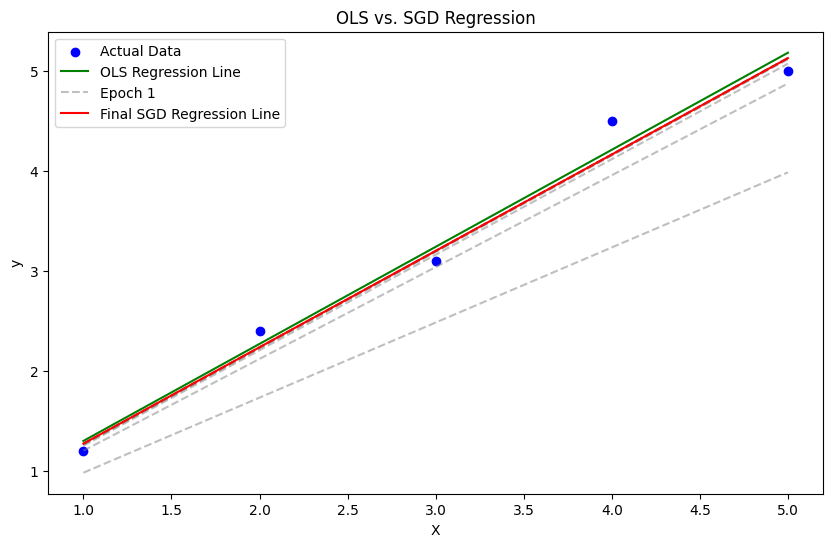

OLS Parameters: w = 0.970, b = 0.330
SGD Parameters: w = 0.963, b = 0.310


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
X = np.array([1, 2, 3, 4, 5])
y = np.array([1.2, 2.4, 3.1, 4.5, 5.0])

# ----------- OLS Method -----------
# Compute OLS parameters
X_mean = np.mean(X)
y_mean = np.mean(y)
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean)**2)
w_ols = numerator / denominator
b_ols = y_mean - w_ols * X_mean

# Predictions with OLS
y_pred_ols = w_ols * X + b_ols

# ----------- SGD Method -----------
# Parameters for SGD
epochs = 10  # Number of iterations (epochs)
eta = 0.01  # Learning rate
w_sgd, b_sgd = 0, 0  # Initialize weights and bias

# Store the predictions at each epoch for visualization
history_y_pred = []

# Perform SGD (iterative optimization)
for epoch in range(epochs):
    for i in range(len(X)):
        # Prediction for the current sample
        y_pred = w_sgd * X[i] + b_sgd

        # Calculate gradients
        dw = -2 * X[i] * (y[i] - y_pred)
        db = -2 * (y[i] - y_pred)

        # Update the parameters
        w_sgd -= eta * dw
        b_sgd -= eta * db

    # Save the predictions after each epoch (complete dataset)
    y_pred_epoch = w_sgd * X + b_sgd
    history_y_pred.append(y_pred_epoch)

# Final SGD Predictions
y_pred_sgd = w_sgd * X + b_sgd

# ----------- Visualization -----------
plt.figure(figsize=(10, 6))

# Plot dataset as scatter points
plt.scatter(X, y, color='blue', label='Actual Data')

# Plot OLS results (green line)
plt.plot(X, y_pred_ols, color='green', label='OLS Regression Line')

# Plot intermediate SGD results (dashed gray lines)
for i in range(len(history_y_pred)):
    plt.plot(X, history_y_pred[i], linestyle='--', color='gray', alpha=0.5, label=f'Epoch {i + 1}' if i == 0 else "")

# Plot final SGD regression line (red)
plt.plot(X, y_pred_sgd, color='red', label='Final SGD Regression Line')

plt.title('OLS vs. SGD Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print final OLS and SGD parameters
print(f"OLS Parameters: w = {w_ols:.3f}, b = {b_ols:.3f}")
print(f"SGD Parameters: w = {w_sgd:.3f}, b = {b_sgd:.3f}")
